In [1]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# data1 = np.load('../Preprocessing/Dumps/ICA_30sec_detrended.dumps')
data2 = np.load('ICA_30sec_redetrended.dumps')

In [5]:
# print len(data1), len(data1[0])
print len(data2), len(data2[0])

61 3383768


In [6]:
# def plot_pearson(channel1, channel2, start, interval_length):
#     plt.scatter(z_score[channel1][start:start+interval_length], z_score[channel2][start:start+interval_length], alpha = 0.1)
# #     pearson_data = pearsonr(z_score[channel1][start:start+interval_length], z_score[channel2][start:start+interval_length])[0]
# #     pearson_ = []
# #     for i in range(interval_length):
# #         pearson_.append(pearson_data * i)
# #     plt.plot(range(start, start + interval_length), pearson_, 'r')
#     plt.show()
#     print channel1, channel2, start#, "beginning", pearson_data

In [9]:
def plot_pearson(channel1, channel2, start, end, data):
    fig = plt.figure(figsize=(10,10))
    fig.add_subplot(111)
    plt.scatter(data[channel1][start:end], data[channel2][start:end], alpha = 0.01)
    pearson_data = pearsonr(data[channel1][start:end], data[channel2][start:end])
    start /= 1000
    end /= 1000
    print start,end
    if (start%60 < 10):
        time_start = str(start/60) + ".0" + str(start%60)
    else:
        time_start = str(start/60) + "." + str(start%60)
        
    if (end%60 < 10):
        time_end = str(end/60) + ".0" + str(end%60)
    else:
        time_end = str(end/60) + "." + str(end%60)
    plt.title("Channel %s vs Channel %s: %s - %s, Pearson Correlation = %s, p-value = %s"\
              % (channel1 + 1, channel2 + 1, time_start, time_end, round(pearson_data[0], 3), round(pearson_data[1], 3)))
    plt.xlabel('Channel %s' %(channel1 + 1))
    plt.ylabel('Channel %s' %(channel2 + 1))
    plt.savefig('../media/ica_pearson_scatterplots/Channel %s vs Channel %s %s - %s.png'\
                % (channel1 + 1, channel2 + 1, time_start, time_end))
#     plt.show()
    print channel1, channel2, start, end, round(pearson_data[0], 3), round(pearson_data[1], 3)

0 30


IOError: [Errno 2] No such file or directory: '../media/ica_pearson_scatterplots/Channel 1 vs Channel 1 0.00 - 0.30.png'

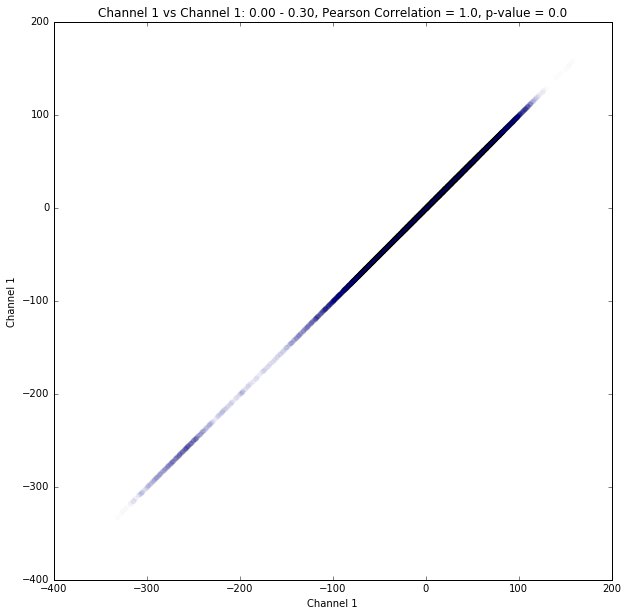

In [8]:
for i in range(113):
    for j in range(61):
        for k in range(j, 61):
            start = 30000 * i
            if i != 112:
                plot_pearson(j, k, start, start + 30000, data2)
            else:
                plot_pearson(j, k, start, 3383768, data2)